In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)
# training_set = train_datagen.flow_from_directory('rps_train',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

In [3]:
import numpy as np 
import pandas as pd
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep 

In [4]:
#pip install pandas

Working with 712 images
Image examples: 
41HC0VBlHSRhi0AG.png


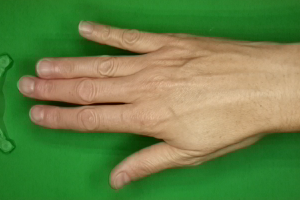

4484TuJc6AH7pDOG.png


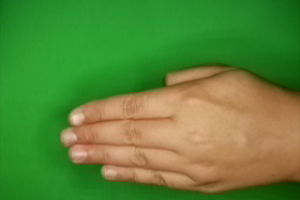

In [5]:
paper = "rps_train/paper"
rock = "rps_train/rock"
scissors = "rps_train/scissors"

paperfiles = [f for f in os.listdir(paper) if os.path.isfile(os.path.join(paper, f))]
rockfiles = [f for f in os.listdir(rock) if os.path.isfile(os.path.join(rock, f))]
scissorsfiles = [f for f in os.listdir(scissors) if os.path.isfile(os.path.join(scissors, f))]

print("Working with {0} images".format(len(paperfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(paperfiles[i])
    display(_Imgdis(filename=paper+ "/" + paperfiles[i], width=240, height=320))

In [6]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files1 = []
train_files2 = []
train_files3 = []
y_train = []
i=0
for _file in paperfiles:
    train_files1.append(_file)
    label_in_file = 1
    y_train.append(label_in_file)

for _file in rockfiles:
    train_files2.append(_file)
    label_in_file = 2
    y_train.append(label_in_file)

for _file in scissorsfiles:
    train_files3.append(_file)
    label_in_file = 3
    y_train.append(label_in_file)
    

# Original Dimensions
image_width = 300
image_height = 200
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files1)+len(train_files2)+len(train_files3), channels, image_height, image_width),dtype=np.float32)

i = 0
for _file in train_files1:
    img = load_img(paper + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 50, 75))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

250 images to array
500 images to array
All images to array!


In [7]:
for _file in train_files2:
    img = load_img(rock + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 50, 75))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

750 images to array
1000 images to array
1250 images to array
All images to array!


In [8]:
for _file in train_files3:
    img = load_img(scissors + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 50, 75))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

1500 images to array
1750 images to array
2000 images to array
All images to array!


In [15]:
dataset.shape

(2188, 3, 50, 75)

In [9]:
X_new = dataset.reshape(2188,-1)


In [12]:
def compute_pca(X,n_components=2):
    X_demeaned = X-np.mean(X,axis=0)
    print('X_demeaned.shape:', X_demeaned.shape)
    covariance_matrix = np.cov(X_demeaned, rowvar= False)
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')
    idx_sorted = np.argsort(eigen_vals)
    idx_sorted_decreasing = idx_sorted[::-1]
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]
    eigen_vecs_subset = eigen_vecs_sorted[:, 0:n_components]
    print('Eigen vectors shape:', eigen_vecs_subset.shape)
    X_reduced = np.dot(eigen_vecs_subset.transpose(), X_demeaned.transpose()).transpose()
    return X_reduced


In [13]:
XX = compute_pca(X_new)

X_demeaned.shape: (2188, 11250)
Eigen vectors shape: (11250, 2)
